# Abstract
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
This research report aims to explore the importance of early cancer detection and the application of liquid biopsy technology in cancer diagnosis[1]. In this report, we introduced cancer as one of the leading causes of human death and pointed out that the number of cancer patients worldwide is growing at an alarming rate[2]. We firmly believe that if cancer can be detected early, patient survival rates can be improved through effective treatment[3].
</p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
To achieve early detection, we have introduced liquid biopsy technology[4], specifically the application of circulating tumor DNA (ctDNA). This technology reflects the characteristics of tumors through fragments of tumor DNA in blood samples[5]. Our team has developed a new blood test based on blood samples that can detect seven different types of cancer by analyzing the DNA fragmentation patterns of cancer cells[6]. We found that this approach is cost-effective, simple and has the potential to be a more cost-effective alternative to other cancer screening tests.
</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In this study, based on the discussion in the original paper, we used the cfDNA information of 423 patients collected in the original paper(shown in reference part), combined with traditional machine learning methods, such as support vector machines, decision trees and random forests, to determine the cancer type of cancer patients. And the simulated annealing algorithm and the adaptive syner-gizing Shuffled Frog Leaping Algorithm are used to improve the svm algorithm and ultimately achieve better results[7]. We also performed analysis on the data for dimensionality reduction and feature selection, and evaluated the performance of the model. The final results show that our method achieves good results in the classification of cfDNA data sets[8], with an AUC value reaching 0.932. Compared with the original paper, the AUC value maintains similar results (AUC value) based on reduced iterations. And some methods have improved. For example, the method of ASVM with sigmoid kernel has improved by about 0.02.
</p>


# Background & Introduction

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
The development of medical technology has prompted people to re-examine various diseases[9]. However, cancer remains a persistent medical challenge and one of the seven leading causes of human death. The recent World Cancer Report released by the International Agency for Research on Cancer (IARC) states that the number of cancer patients worldwide is growing rapidly (9.6 million deaths and 18.1 million new cases in 2018) (Wild et al., 2020)[10]. IARC predicts that by 2040, there will be more than 27 million new cancer cases worldwide each year (a 50% increase compared to 2018). If cancer is detected early, survival rates can be improved with effective treatment (World Health Organization, 2017)[11]. The five-year survival rates for early diagnosis and late diagnosis are 91% and 26%, respectively (Chen et al., 2020)[12]. Therefore, early detection of cancer is crucial for effective patient treatment.
It is known that the occurrence of cancer is closely related to the accumulation of genetic mutations, and these mutations cannot be repaired, causing cells to lose normal regulation and undergo malignant proliferation (Helleday et al., 2014)[13,14]. Genetic analysis of cancer cells is an effective and important direction to understand their mechanisms and match treatment modalities[15]. In recent years, liquid biopsy technology (Diaz and Bardelli, 2014) represented by circulating tumor DNA (ctDNA) (De Mattos-Arruda et al., 2013) has been intensively researched and developed. It greatly overcomes the difficulty of obtaining tumor tissue. Circulating tumor DNA refers to tumor-derived DNA fragments flowing in the blood circulation system[16]. It is preliminarily speculated that the sources of ctDNA mainly come from the following pathways (Diehl et al., 2005): necrosis or apoptosis of tumor cells causes DNA fragments to enter the blood; the tumor cells themselves enter the blood and secrete exosomes. It can reflect the characteristics of tumor genes. In addition, because blood samples are easy to obtain and less invasive, it can solve some of the difficulties in cancer detection.
</p>



Before the experiment, we should ensure the python library files are correctly installed and imported.

In [1]:
import random
import pickle
from numpy import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.utils import shuffle
from sklearn.utils.multiclass import type_of_target
from sklearn.decomposition import PCA
from sklearn import linear_model, metrics, preprocessing, model_selection, decomposition, manifold, gaussian_process, neighbors, ensemble, utils
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE, SpectralEmbedding
from xgboost import XGBClassifier

import sys
print(sys.version)

random.seed(4487)

3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:53:32) [GCC 12.3.0]


# Data Description and Feature Selection
##  Data Description
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In this project, we base on the dataset of cell-free DNA fragmentation data collected by Cristinao et al. [28], with 423 patient records in total. For each record, we can obtain 44 explanatory variables and one response variable.
</p>

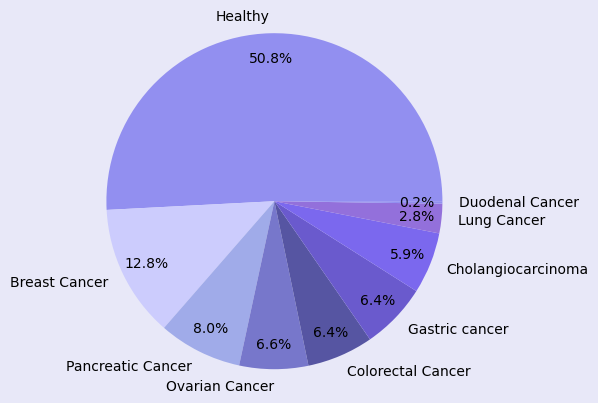

In [5]:
combined_data = pd.read_csv('combined_data.csv')

type_counts = combined_data['Patient Type'].value_counts()
colors = ['#928FF0', "#ccccfd", "#a0abe9","#7777cb", "#5655a2", '#6A5ACD','#7B68EE', '#9370DB']
fig, ax = plt.subplots()
fig.patch.set_facecolor('#e8e8f8')
ax.pie(type_counts, labels=type_counts.index, colors=colors, autopct='%1.1f%%', pctdistance=0.85)
ax.axis('equal')
# ax.set_title('Patient Type Distribution', pad = 20)
plt.show()

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
The figure above shows that there are 423 entries in the dataset, with roughly half of them being health records and the other half consisting of eight different types of cancer data. However, the number of data entries for each specific cancer category is much smaller than the health record entries, with some types having less than five entries, which makes the dataset highly unbalanced. Therefore, we have decided to perform a binary classification task on this dataset, where we will group the categories into 'Healthy' and 'Cancer' types for further research.</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
We used a heatmap to explore the correlation between 44 explanatory variables and one response variable. Due to the complexity of the variables in this dataset, we chose to analyze their relationship using the Spearman Correlation Coefficient. This coefficient is better suited for capturing non-linear monotonic relationships, as it replaces the original data values with their ranked values. In contrast, the Pearson Correlation Coefficient is better suited for analyzing linear relationships between variables. </p>


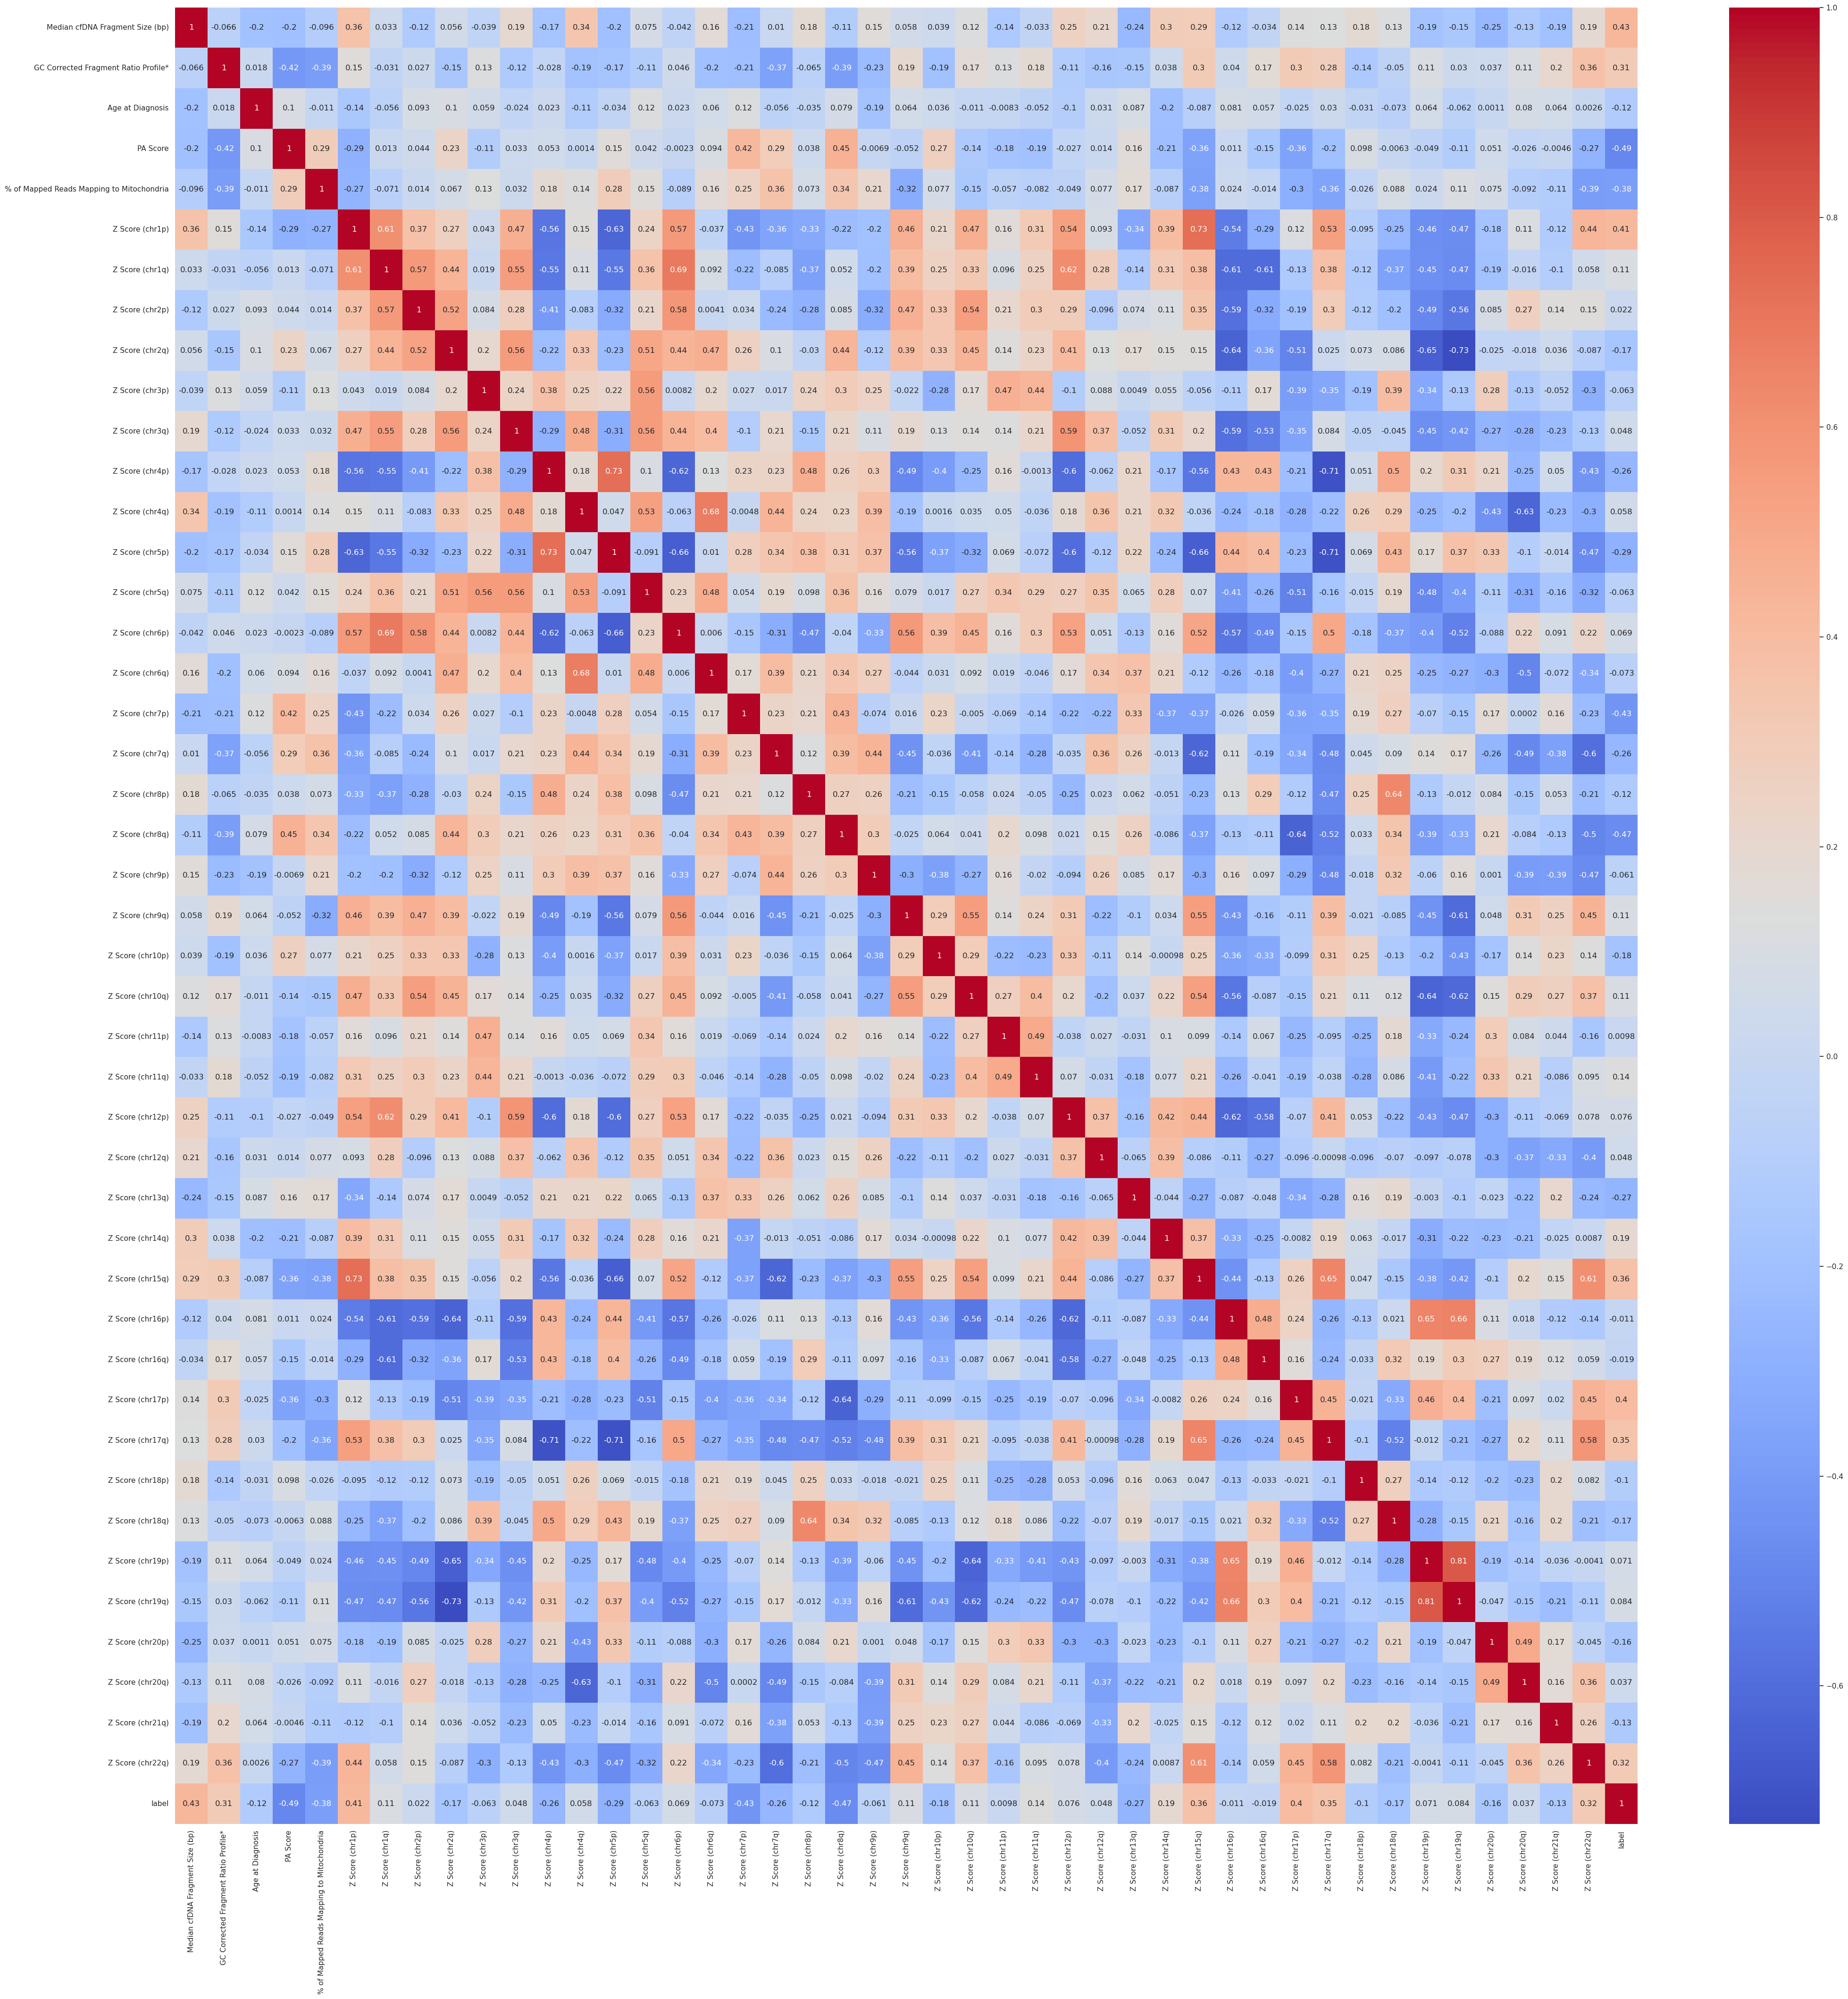

In [6]:

rows_to_update = combined_data[combined_data['Patient Type'] != 'Healthy']
combined_data.loc[rows_to_update.index, 'Patient Type'] = 'Cancer'


label_transform = preprocessing.LabelEncoder().fit(combined_data['Patient Type'])

combined_data = combined_data.copy()
combined_data.loc[:, 'label'] = label_transform.transform(combined_data.loc[:, 'Patient Type'])

type_transformed_data = combined_data.drop(['Patient Type'],axis = 1)

correlation_matrix = type_transformed_data.corr(method='spearman')
plt.figure(figsize=(50, 50)) 
sns.set(rc={'axes.facecolor':'#e8e8f8', 'figure.facecolor':'#e8e8f8'})
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap of Type Transformed Data')
plt.show()

In [7]:
x = type_transformed_data.iloc[:, 0:44]
x[isnan(x)] = 0
y=type_transformed_data.iloc[:,44]
labels = []
for i in range(0, 2):
    labels.append(label_transform.inverse_transform([i])[0])
labels

['Cancer', 'Healthy']

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In order to provide data insights, we visualized the dataset by utilizing dimensional reduction methods such as t-distributed Stochastic Neighbor Embedding, Principal Component Analysis, and Spectral Embedding. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">

**T-Distributed Stochastic Neighbor Embedding** </p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">    
It is an effective technique for reducing the dimensionality of high-dimensional data while preserving its local structure in a low-dimensional space. It ensures that similar data points remain similar in the low-dimensional space while dissimilar ones remain dissimilar. T-SNE is particularly useful for downscaling high-dimensional data to 2 or 3 dimensions, making it easier to explore and visualize the structure of complex data.
</p>

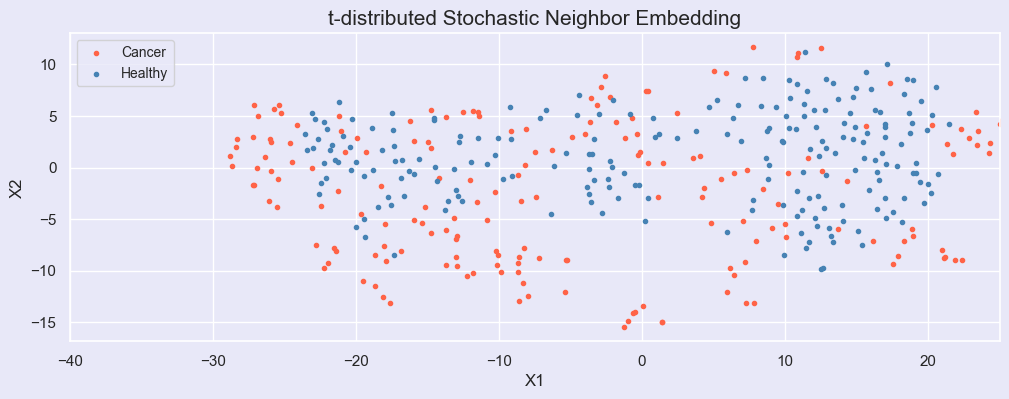

In [12]:
# TSNE
x_new = TSNE(n_components=2, random_state=100, learning_rate='auto', init='random').fit_transform(x)

fig = plt.figure(figsize=(12,4))

# Dictionary to hold x1 and x2 values for each type
types_data = {i: {'x1': [], 'x2': []} for i in range(8)}

# Populate the dictionary with x1 and x2 values based on type
for i, y_val in enumerate(y):
    types_data[y_val]['x1'].append(x_new[i][0])
    types_data[y_val]['x2'].append(x_new[i][1])

# Define colors for each type
colors = ['tomato','steelblue', 'slateblue']

# Plot scatter plots for each type
for i, (x1, x2) in enumerate(zip(types_data.values(), colors)):
    if i == 4:
        plt.scatter(x1['x1'], x1['x2'], c=x2, marker='2')
    plt.scatter(x1['x1'], x1['x2'], c=x2, marker='.')

# Assuming le is a LabelEncoder object and its inverse_transform method is available
plt.legend(labels, loc=2, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('t-distributed Stochastic Neighbor Embedding', fontsize=15)
plt.xlim(-40, 25)
plt.show()

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Based on the visualization results shown in the figure above, t-SNE is a method that reduces the original 44-dimensional data into 2 dimensions while attempting to preserve the local similarity relationships between data points. The goal is to cluster similar data points together. However, the results in the figure indicate that the local similarity relationships between the data points are not strong. In fact, the data points from both categories are mixed together, and they are distributed in a scattered manner in the two-dimensional space without any discernible patterns. This suggests that the T-Distributed Stochastic Neighbor Embedding downscaling method may not be suitable for our dataset. As a result, we will try other downscaling methods to obtain better results. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">

**Principal Component Analysis (PCA)**   </p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
It is a statistical method used to reduce the dimensionality of a dataset while preserving the main features of the data. It does this by finding the main directions of variation in the data (i.e., principal components.) The main role of PCA is data dimensionality reduction, which helps us understand the intrinsic structure of the data, and it can also be used for data compression and feature extraction.
</p>

In [13]:
'''PCA'''
# Assuming x and y are already defined
x_new = preprocessing.scale(x)
x_new = PCA(n_components=2).fit_transform(x_new)

fig = plt.figure(figsize=(12, 4))

# Dictionary to hold x1 and x2 values for each type
types_data = {i: {'x1': [], 'x2': []} for i in range(8)}

# Populate the dictionary with x1 and x2 values based on type
for i, y_val in enumerate(y):
    types_data[y_val]['x1'].append(x_new[i][0])
    types_data[y_val]['x2'].append(x_new[i][1])

# Define colors for each type
colors = ['tomato', 'steelblue', 'slateblue']

# Plot scatter plots for each type
for i, (x1, x2) in enumerate(zip(types_data.values(), colors)):
    if i == 4:
        plt.scatter(x1['x1'], x1['x2'], c=x2, marker='2')
    plt.scatter(x1['x1'], x1['x2'], c=x2, marker='.')

# Assuming label_transform is a LabelEncoder object and its inverse_transform method is available
plt.legend(labels, loc=5, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Principal Component Analysis', fontsize=15)
plt.show()

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;"> 
Based on the visualization results obtained from PCA analysis, it is observed that while there are some overlapping areas in the downscaling results, the difference and boundaries between the two classes are much clearer, especially when the maximum variance X1 is larger, it can clearly distinguish the Cancer category. Compared with t-SNE, PCA is obviously more suitable for our dataset and features.</p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;"> 

**Spectral Embedding** </p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">   
It is a dimensionality reduction method used in data analysis and machine learning that is based on the spectral theory of graph theory. This method is able to effectively map high-dimensional data into a low-dimensional space while preserving the local and global structure in the data. Unlike linear methods of PCA, Spectral Embedding is also able to recognise non-linear patterns in the data.
</p>

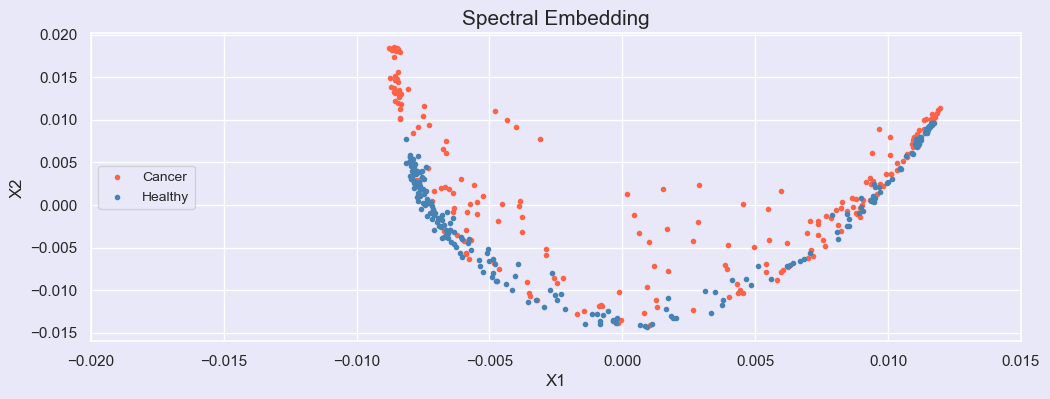

In [38]:
'''Spectral Embedding'''
x_new = SpectralEmbedding(n_components=2).fit_transform(x)
fig = plt.figure(figsize=(12, 4))

# Dictionary to hold x1 and x2 values for each type
types_data = {i: {'x1': [], 'x2': []} for i in range(8)}

# Populate the dictionary with x1 and x2 values based on type
for i, y_val in enumerate(y):
    types_data[y_val]['x1'].append(x_new[i][0])
    types_data[y_val]['x2'].append(x_new[i][1])

# Define colors for each type
colors = ['tomato', 'steelblue', 'slateblue']

# Plot scatter plots for each type
for i, (x1, x2) in enumerate(zip(types_data.values(), colors)):
    if i == 4:
        plt.scatter(x1['x1'], x1['x2'], c=x2, marker='2')
    plt.scatter(x1['x1'], x1['x2'], c=x2, marker='.')

# Assuming label_transform is a LabelEncoder object and its inverse_transform method is available
plt.legend(labels, loc=6, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Spectral Embedding', fontsize = 15)
plt.xlim(-0.020, 0.015)

plt.subplots_adjust(hspace=0.4) # Adjust the space
plt.show()

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Through the above figure, we can find that SE captures the flow structure and non-linear relationships in the data by feature decomposition of the similarity matrix. It shows the difference between the two classes more clearly relative to t-SNE, and we can observe in the visualization results above that the Cancer class is basically located above Healthy for a certain number of X1 features, but there are still some overlapping features. </p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Among the above three dimensionality reduction methods, we can find that the use of PCA dimensionality reduction has achieved better results, in the subsequent data analysis we will mainly apply this method to our data dimensionality reduction processing.

</p>

## Feature Ranking
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
To deepen our understanding of the intricate nature of cancer detection, we harnessed the power of a random forest algorithm to discern the significance of features within the original dataset. Two distinct metrics guided our exploration: the reduction in Gini purity upon exclusion, and the assessment through recursive feature elimination.
</p>


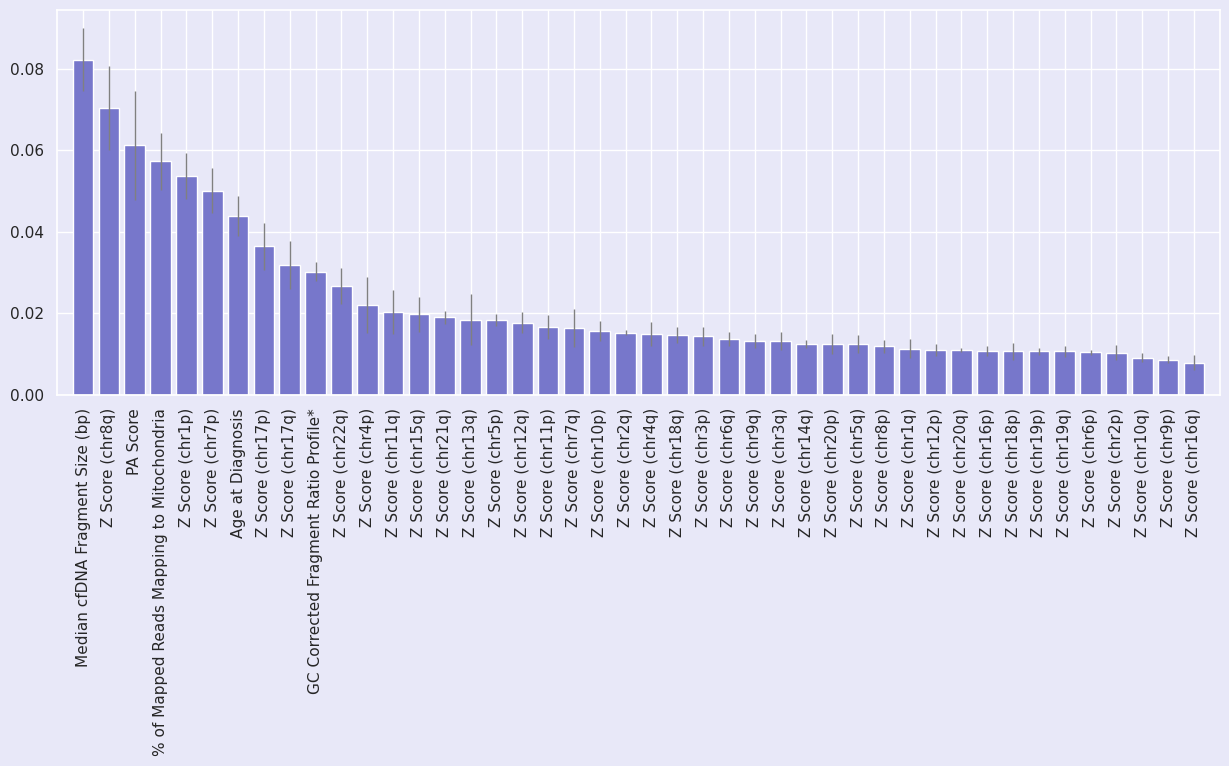

In [8]:
#---Decrese in Purity ---#
def RandomCV(x,y,nfold,nestimator):
    KF = KFold(n_splits=nfold,shuffle=True, random_state=5)
    i = 0
    for train_index,test_index in KF.split(x):
        #---  Seperate traing set and test set ---#
        x_train, x_test = x.iloc[train_index][:], x.iloc[test_index][:]
        y_train = y.iloc[train_index][:]

        #---  creat and train the model ---#
        clf = ensemble.RandomForestClassifier(n_estimators =nestimator, random_state = 42, class_weight="balanced")
        clf.fit(x_train, y_train)
        if i==0:
            FeatureImp = clf.feature_importances_
        else:
            FeatureImp = vstack((FeatureImp, clf.feature_importances_))
        i+=1
    return FeatureImp

for i in range(0,300):
    if i==0:
        FeatureImp = RandomCV(x,y,5,100)
    else:
        FeatureImp = vstack((FeatureImp, RandomCV(x,y,5,100)))

ImpMean = FeatureImp.mean(axis=0)        
ImpStd = FeatureImp.std(axis=0)
sorted_idx = ImpMean.argsort()[::-1]

# Plot the impurity-based feature importances of the forest
fig = plt.figure(figsize=(15,5))
# plt.title("Feature importances")
plt.bar(range(x.shape[1]), ImpMean[sorted_idx],
        color='#7777cb', yerr=ImpStd[sorted_idx], align="center", ecolor='gray', error_kw = {'elinewidth':1})
plt.xticks(range(x.shape[1]), x.columns[sorted_idx],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

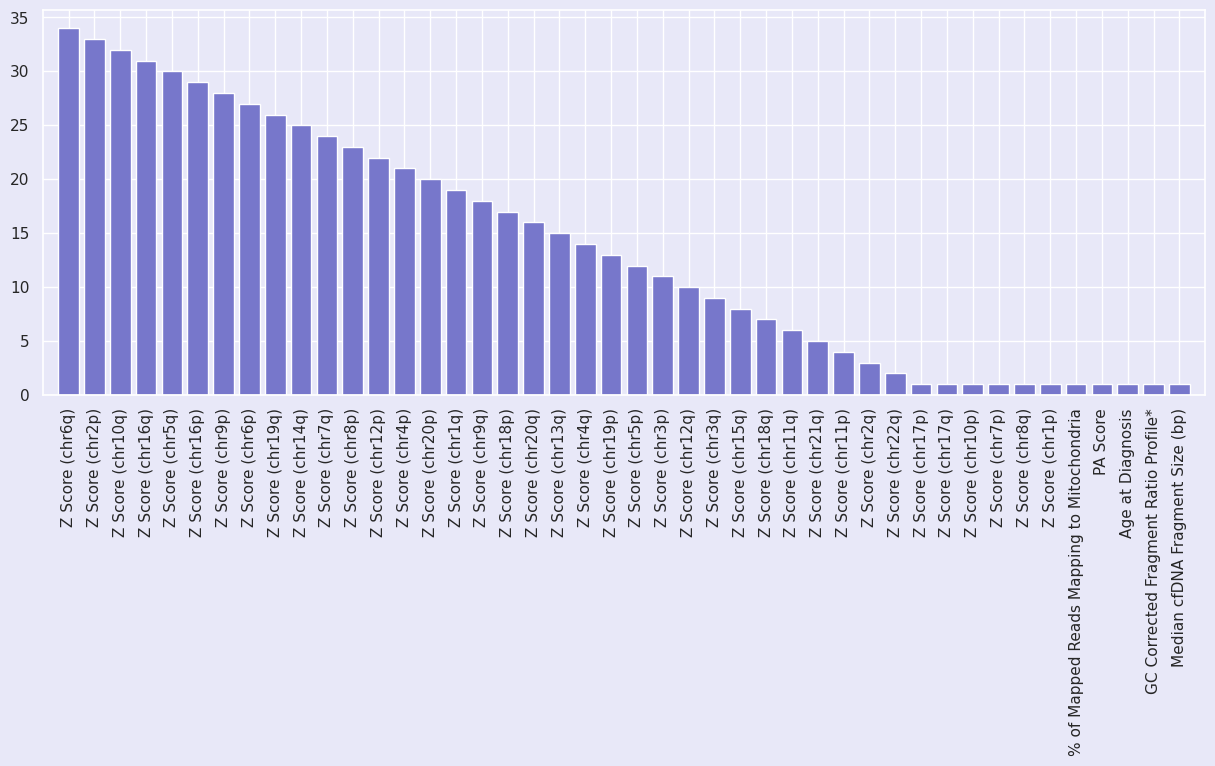

In [9]:
#---Recursive Feature Elimination ---# 
from sklearn.model_selection import StratifiedKFold
clf=ensemble.RandomForestClassifier(n_estimators =31, random_state = 42, class_weight="balanced")
rfecv = feature_selection.RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),scoring='accuracy')
rfecv.fit(x, y)
rfecv.ranking_

Imp = rfecv.ranking_       
sorted_idx = Imp.argsort()[::-1]
ImpStd = Imp.std(axis=0)

fig = plt.figure(figsize=(15,5))
# plt.title("Feature importances")
plt.bar(range(x.shape[1]), Imp[sorted_idx],color='#7777cb')
plt.xticks(range(x.shape[1]), x.columns[sorted_idx],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
According to the principle of RFE, a lower ranking indicates that the feature has been deleted less times during the selection process, suggesting it is more important. </p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Combining the two graphs above, we can see that the two methods are largely consistent in their ranking of feature importance. This consistency emphasizes the intrinsic link between the two criteria when assessing feature relevance. </p>


## Data Preprocessing
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
This is the data preprocessing part,we transform the csv file data into array and store them into a pickle file for later use.This part code need to modify the path of input xlsx file.
</p>

In [4]:
def load_data():
    xl = pd.ExcelFile('data2.xlsx')
    dfs = {sheet: xl.parse(sheet) for sheet in xl.sheet_names}

    data1 = dfs['7']
    data2 = dfs['1'].loc[:, ['Patient', 'Age at Diagnosis']].drop([554]).drop_duplicates()
    data3 = pd.read_csv('data1.csv')
    combined_data = data1.set_index('Patient').join(data2.set_index('Patient')).join(data3.set_index('Patient'))
    combined_data['label'] = np.where(combined_data['Patient Type'] == 'Healthy', 0, 1)  # transform to label
    combined_data = combined_data.drop(['Patient Type'], axis=1)
    combined_data.to_csv('data.csv', index=False)
    print(
        'The number of samples and features are %d and %d, respectively' % (
            combined_data.shape[0], combined_data.shape[1]))

    x = combined_data.iloc[:, 0:44]
    x[isnan(x)] = 0
    y = combined_data.iloc[:, 44]
    label=np.where(combined_data['label'] == 0, 'Healthy', 'Postive')

    print(type_of_target(x))
    print(type_of_target(y))
    print(type(x))
    print(type(y))

    x, y = shuffle(x, y, random_state=4487)

    scaler = preprocessing.StandardScaler()  # make scaling object
    x = scaler.fit_transform(x)  # use training data to fit scaling parameters

    return x, y, label


def train_test_split(x, y):
    trainX, testX, trainY, testY = \
        model_selection.train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=4487)
    return trainX, trainY, testX, testY


def plot_roc(validY, validProb):
    # ROC AUC
    fpr, tpr, thresholds = metrics.roc_curve(validY, validProb, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)

    print("ROC_AUC :", roc_auc)

    fig = plt.figure()
    fig.patch.set_facecolor('#e8e8f8')
    plt.plot(fpr, tpr, lw=2, color='#7777cb')
    plt.title('AUC={:.4f}'.format(roc_auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.gca().set_facecolor('#e8e8f8')

    plt.grid(True)
    plt.show()





In [42]:
x, y, label = load_data()
data = {'x': x,'y': y,'label': label}

with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)

The number of samples and features are 423 and 45, respectively
continuous-multioutput
binary
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
with open('data.pkl', 'rb') as file:
        data_loaded = pickle.load(file)
x = data_loaded['x']
y = data_loaded['y']
label = data_loaded['label']
trainX, trainY, testX, testY = train_test_split(x, y)

# Classification Methods
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In this part, we used many different kinds of method (including KNN,GCP,LR,emsemble methods and an improved ASVM method) to test the performance.
</p>

In [7]:
def KNN(trainX, trainY, testX):
    param_grid = {
        'pca__n_components': [11], # Number of components for PCA
        'knn__n_neighbors': [i for i in range(2, 30)],
        'knn__weights': ['distance', 'uniform'],
        'knn__p': [1, 2]
    }

    # Create a pipeline with PCA and KNeighborsClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('knn', KNeighborsClassifier())
    ])

    # Use GridSearchCV to find the best parameters
    knn = GridSearchCV(pipeline, param_grid, cv=10)
    knn.fit(trainX, trainY)

    print("knn best parameters: ", knn.best_params_)
    pred = knn.predict(testX)
    prob = knn.predict_proba(testX)[:, 1]
    return pred, prob

def GPC(trainX, trainY, testX):
    kernel_options = [1.0 * RBF(length_scale=10), 1.0 * Matern(length_scale=10)]
    param_grid = {
        'pca__n_components': [11], # Number of components for PCA
        'gpc__kernel': kernel_options,
        'gpc__n_restarts_optimizer': [0, 1, 2]
    }

    # Create a pipeline with PCA and GaussianProcessClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('gpc', GaussianProcessClassifier(random_state=4487))
    ])

    # Use GridSearchCV to find the best parameters
    gpc = GridSearchCV(pipeline, param_grid, cv=10)
    gpc.fit(trainX, trainY)

    print("GPC best parameters: ", gpc.best_params_)
    pred = gpc.predict(testX)
    prob = gpc.predict_proba(testX)[:, 1]
    return pred, prob


def LR(trainX, trainY, testX):
    # Standardize the data
    scaler = StandardScaler()
    trainX_scaled = scaler.fit_transform(trainX)
    testX_scaled = scaler.transform(testX)

    # Apply PCA
    pca = PCA(n_components=11) # Choose the number of components
    trainX_pca = pca.fit_transform(trainX_scaled)
    testX_pca = pca.transform(testX_scaled)

    lr = linear_model.LogisticRegressionCV(
        Cs=logspace(-4, 4, 20), 
        cv=10, 
        max_iter=10000, 
        multi_class='multinomial', 
        scoring='accuracy',
    )
    lr.fit(trainX_pca, trainY)

    prob = lr.predict_proba(testX_pca)[:, 1]
    pred = lr.predict(testX_pca)

    return pred, prob

## Logistic Regression
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Logistic Regression
Logistic regression is a basic and widely used classification method in machine learning. Suitable for two-classification problems, through the S-shaped function (ie Logistic function), the output of the linear equation is mapped between 0 and 1, and the probability of belonging to a certain category can be obtained. In cancer detection, logistic regression models can be used to analyze and compare the relationship between different characteristics (such as cfDNA fragment size) and the probability of cancer presence. Logistic regression has the advantages of strong model interpretability, simple implementation, and high computational efficiency, but it is limited in dealing with nonlinear relationships and complex interactions between features. This may be the case when there are many types of cfDNA samples and the relationships between features may be complex. is a limiting factor.
</p>

0.84251968503937
ROC_AUC : 0.9202898550724637


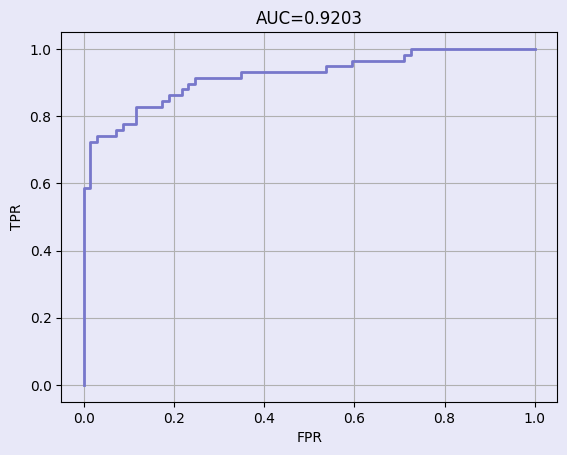

In [8]:
lr_pred, lr_prob = LR(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, lr_pred)  # 超低
print(acc)
plot_roc(testY, lr_prob)

## K-Nearest Neighbors (KNN)
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
KNN is a simple machine learning classification method based on the proximity algorithm and is suitable for multi-classification problems. KNN classifies data points with similar characteristics into the same category by measuring the distance between different feature points. In the application of cancer detection, KNN can identify the similarities and differences between cfDNA samples and provide a reference for cancer classification. The disadvantage is that KNN has a high computational cost for large data sets (because the distance between each test sample and all training samples needs to be calculated), and the performance may decrease in the case of sample imbalance.
</p>

knn best parameters:  {'knn__n_neighbors': 8, 'knn__p': 2, 'knn__weights': 'distance', 'pca__n_components': 11}
0.8110236220472441
ROC_AUC : 0.8930534732633684


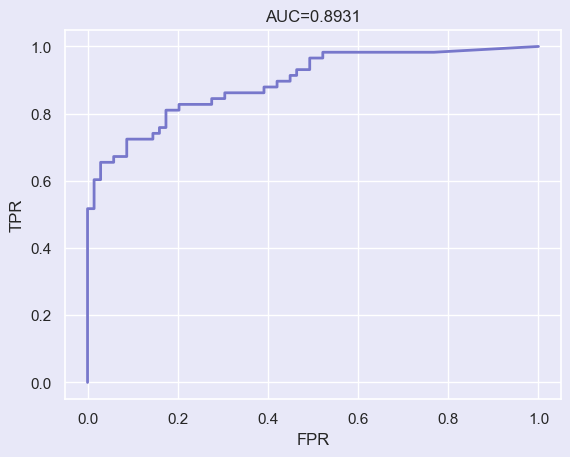

In [46]:
knn_pred, knn_prob = KNN(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, knn_pred)
print(acc)
plot_roc(testY, knn_prob)

## Gaussian Process Classifier (GPC)
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
GPC uses probabilistic models to classify data and provides a general supervised learning method. In cancer detection, GPC can predict classification by considering the probability distribution of data points, providing continuous output as well as probabilistic interpretation, helping to make judgments under high uncertainty. Disadvantages of GPC include high computational complexity, especially when the number of features is large, and the need to select an appropriate kernel function to determine the covariance structure of the data, which requires more expertise.

GPC best parameters:  {'gpc__kernel': 1**2 * Matern(length_scale=10, nu=1.5), 'gpc__n_restarts_optimizer': 0, 'pca__n_components': 11}
0.8503937007874016
ROC_AUC : 0.9090454772613693


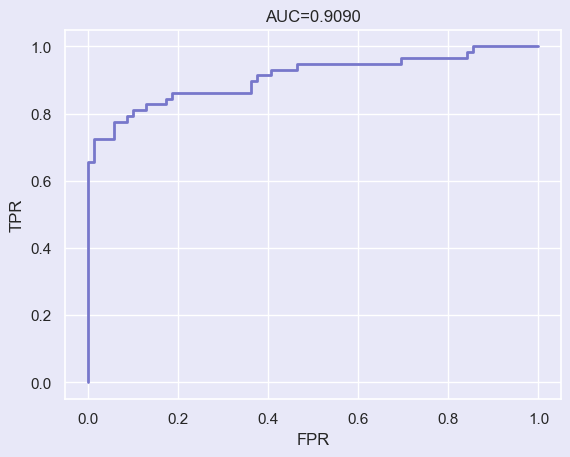

In [47]:
gpc_pred, gpc_prob = GPC(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, gpc_pred)
print(acc)
plot_roc(testY, gpc_prob)

## Ensemble Methods

In [48]:
def RF(trainX, trainY, testX):
    
    param_grid = {
        'pca__n_components': [11], # Number of components for PCA
        'rf__n_estimators': [500, 600, 800]
    }
    
    # Create a pipeline with PCA and RandomForestClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('rf', RandomForestClassifier(random_state=4487))
    ])

    # Use GridSearchCV to find the best parameters
    rf = GridSearchCV(pipeline, param_grid, cv=10)
    rf.fit(trainX, trainY)

    print("RF Parameter:", rf.best_params_)

    pred = rf.predict(testX)
    prob = rf.predict_proba(testX)[:, 1]
    return pred, prob


def XGBoost(trainX, trainY, testX):
    
    param_grid = {
        'pca__n_components': [11],
        'xgb__learning_rate': logspace(-3, 3, 20),
        'xgb__n_estimators': array([500, 1000])
    }
    # print(paramgrid)

    # Create a pipeline with PCA and XGBoostClassifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('xgb', XGBClassifier(eval_metric='logloss', random_state=4487))
    ])

    # Use GridSearchCV to find the best parameters
    xgb = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
    xgb.fit(trainX, trainY)
    print("best params:", xgb.best_params_)

    pred = xgb.predict(testX)
    prob = xgb.predict_proba(testX)[:, 1]

    return pred, prob

### Random Forest
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Random forest is a member of ensemble learning that can handle multi-classification problems and provide an evaluation of feature influence. By building multiple decision trees and combining their results, random forests can provide powerful classification performance in data containing complex interrelationships and nonlinear relationships. In the case of cancer detection, random forests can process a large number of features and evaluate their importance for cancer prediction. The advantage is that it is very robust to noise and outliers; however, the random forest model may lead to overfitting when generating too many trees, and the model's interpretability is worse than logistic regression.
</p>

RF Parameter: {'pca__n_components': 11, 'rf__n_estimators': 800}
0.84251968503937
ROC_AUC : 0.8930534732633683


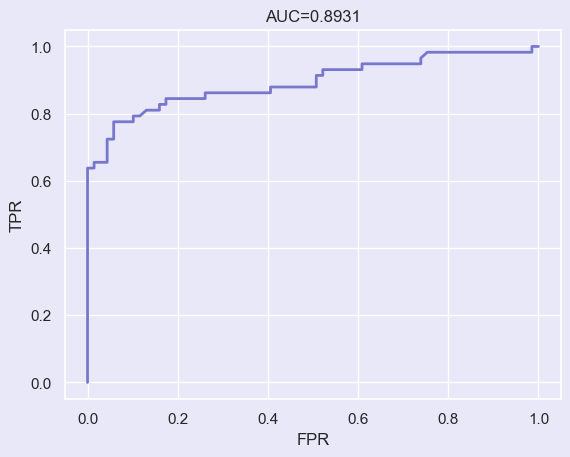

In [49]:
RF_pred, RF_prob = RF(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, RF_pred)
print(acc)
plot_roc(testY, RF_prob)

### XGBoost (eXtreme Gradient Boosting)
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
XGBoost is a high-performance machine learning library that provides an optimized version of the gradient boosting method. XGBoost shows excellent performance in handling multi-classification problems and complex data sets, and has the ability to handle large-scale data sets. For complex cancer detection data, XGBoost can capture subtle patterns of cfDNA samples by building models step by step, helping to improve prediction accuracy. However, XGBoost's model adjustment may be relatively complex, and various parameters of the model need to be carefully tuned to avoid overfitting.
</p>

best params: {'pca__n_components': 11, 'xgb__learning_rate': 0.0379269019073225, 'xgb__n_estimators': 500}
0.84251968503937
ROC_AUC : 0.8840579710144928


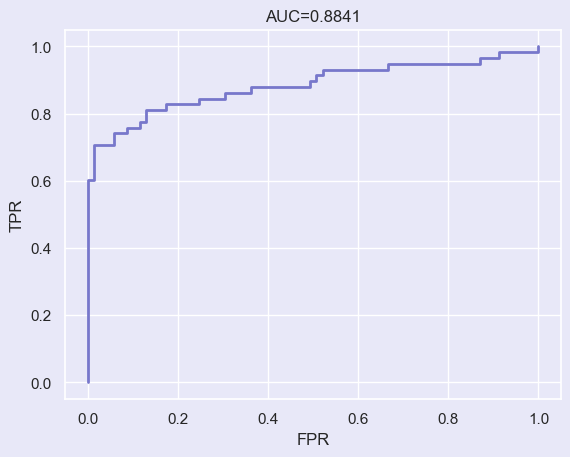

In [50]:
xgb_pred, xgb_prob = XGBoost(trainX, trainY, testX)
acc = metrics.accuracy_score(testY, xgb_pred)
print(acc)
plot_roc(testY, xgb_prob)

## An Improved ASVM Method
#### Brief introduction of ASVM method
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
This approach essentially attempts to improve overall submemory performance, specifically improving the performance of the worst frog[17]. The original ASVM improves by letting the worst individual learn the characteristics of the best individual, while the improved strategy is to randomly select from the global best individual if the new solution found does not improve performance during the local iteration process[18]. one, and add the difference between it and the worst individual to make further attempts.</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">  
The steps of the algorithm are roughly summarized as follows:</p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Initialization of Population (Step 1): The initial population of frogs represents different combinations of parameters, including the penalty coefficient C, kernel parameters gamma, and coef0. Cross-validation methods such as KFold are utilized to evaluate the performance of each frog (i.e., parameter combination) on the validation dataset, with commonly used metrics like the ROC AUC score. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Rank Frogs (Step 2): Frogs are ranked based on the obtained performance (e.g., ROC AUC score) to prepare for global search. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Partition Frogs into Memetic Complexes (Step 3): After ranking the frogs by SVM performance, they are divided into different memetic complexes for localized search, with the allocation process being random. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Local Search in Memetic Complexes (Step 4): A subset of frogs is selected from the memetic complexes to form sub-memetic complexes. During this process, attempts are made to improve the position of Pw using information from Pb. If the new position yields better performance, it is accepted. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Shuffle Memetic Complexes (Step 5): After local searches are conducted, all frogs are shuffled to create new memetic complexes. This shuffling process aims to add diversity to the algorithm, facilitating exploration for potential solutions in the global solution space. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Check for Convergence (Step 6): After each global iteration is completed, the algorithm checks for convergence criteria. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
By combining global and local search strategies, the algorithm aims to balance exploration and exploitation capabilities[19], efficiently finding the global optimum. Additional gaussian perturbation and simulated annealing processes improve the strategy when the search fails by dynamically adjusting the standard deviation of the perturbation to make the search more directed.
</p>

#### Improvement of ASVM method       

ASVM improvements include parallel calculation of the algorithm, dynamic adjustment of the step size and Gaussian interpolation after the frog position update fails[19]. Parallel computing is implemented through the joblib library, and each fold is allocated to run on a separate CPU, significantly optimizing time efficiency[20]. Dynamically adjusting the step size is to cope with the situation when local search fails, making the search step more targeted. Gaussian interpolation is used to search between the global optimal and worst solutions through random perturbations to find a better solution. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">

**Parallel computing** </p>  
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Calculate each fold of K-Fold in parallel using the joblib library. Each fold is run on a separate CPU. The optimization improvement time depends on the hardware configuration. The measured running time is from 3377 to 1800. Second.The result is shown as below:</p>
<div align="center">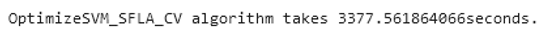</div>
<div align="center"></div>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">

**Dynamically adjust the step size**  </p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">   
When the local frog search fails, we will first randomly select one of the best frogs in the world as a new learning object, but this will make the learning amount (the parameter change amount of the worst frog) uncertain[21]. In the original method The step size is calculated based on the parameter range and fixed sizes sizeC, sizeGamma, sizeCoef0. This paper further[22] dynamically adjusts the step size with the number of iterations, and reduces the step size as the algorithm progresses, in order to search more precisely within the search space. This article introduces a decay factor decay_factor and updates max_step in each global iteration[23]. As the number of iterations increases, the step size will gradually decrease, allowing the algorithm to explore the parameter space more precisely in the later stages. Such adjustments help achieve a better balance between global and local searches, potentially improving the convergence speed of the algorithm and the quality of the solutions found. </p>

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">

**Adaptive weight adjustment**    </p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
When selecting submemory complexes, weights are precalculated based on the frog's ranking. We can dynamically adjust the weights based on the frog's historical performance, which can increase the probability of being selected for frogs whose performance gradually improves[24]. This article no longer uses static weights when selecting sub-memory complexes, but adjusts the weights based on the frog's past performance changes. This paper tracks changes in each frog's past performance and adjusts its probability of being selected based on this change.   </p>
The Implementation is shown as below:    
<div align="center">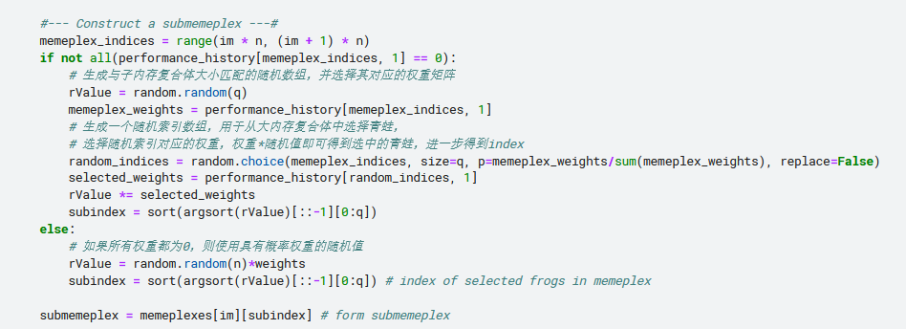</div>

**Implementation logic**        
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
1. First, calculate the index range memeplex_indices of all frogs in the current memory complex.    
2. If the corresponding weights in performance_history are not all 0, select a sub-memory complex.    
3. Use random.choice to randomly select q frogs based on the weight memeplex_weights, where size=q indicates the number of frogs to be selected, and p=memeplex_weights/sum(memeplex_weights) indicates selection based on weight probability. (q elements are randomly selected from the memeplex_indices list, with selection probability proportional to the values in the memeplex_weights list.)    
4. random_indices is the index array of frogs selected based on weight.    
5. selected_weights is the weight corresponding to these frogs.    
6. Then, determine the final selected frog based on the product of rValue and selected_weights.    
7. subindex is the index of the frog selected based on weight and random value.    
Summary: This paper applies weights to improve the selection of sub-memory complexes, so that frogs with better performance have a higher probability of being selected.
</p>

**The adjustment of update rule**        
<div align="center">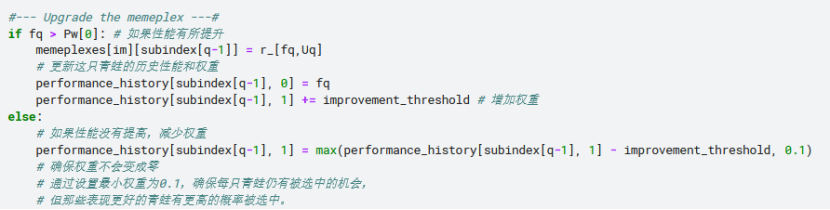</div>    
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
If the SVM classifier performance does not improve, it will reduce the probability that this frog will be selected again as the initial iteration state. By setting the minimum weight to 0.1, we ensure that every frog has a chance of being selected, but those with better performance in the iteration Potential performance improvements have a higher probability. (Potential performance improvement: If this frog is optimized during iterations, it means that it has the possibility of further improvement)</p>

**The original frog spawning strategy**      
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
During the local iteration process, the original ASVM tries to improve the worst frog by letting the worst frog learn the characteristics of the best frog and try to improve the worst frog. At the same time, the overall sub-memory can also be improved through continuous local iteration. (Average) performance.   </p> 
**Improved frog spawning strategy**          
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
First, we added the adaptive Gaussian interpolation method. The function of this process is to dynamically adjust the search range and direction of the solution during the search for the global optimal solution. Specifically, the process includes the following steps:   
1. Calculate the adaptability factor (alpha): This factor decreases as the number of iterations increases, which means that as the optimization process proceeds, the randomness of solution exploration will gradually decrease. This is achieved using an exponential decay function, where iteration represents the current number of iterations and max_iterations represents the maximum number of iterations. As iteration approaches max_iterations , alpha will approach[26].    
2. Generate Gaussian perturbation factor (gauss_factor): Here the normal distribution (Gaussian distribution) is used to generate a random perturbation factor with a mean of 1 and a given standard deviation (here 0.3). Using a Gaussian distribution instead of a uniform distribution can make the generated random numbers more concentrated around the mean, which can provide more fine-grained adjustments during the exploration process.   
3. Assume that the parameter passed in is Pw[1:], then the final result is Uq = Pw[1:] + alpha * gauss_factor * (frog_gb - Pw[1:]) In this way, the new position Uq not only depends on the current position and The global optimal position is determined, and the effects of iterative processes and randomness are also taken into account.   </p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
Secondly,After we introduce Gaussian interpolation.   
The performance of the new frog is still worse than the original, so this article further heats up the results of Gaussian interpolation. Based on the absolute value of the performance gap, as the probability of accepting the new frog, it is necessary to further calculate the probability of accepting the new frog at each time. A temperature parameter T is introduced in each iteration, and this parameter gradually increases with the iteration[27]. In each step of simulated annealing (variant), we still start with the local optimal frog of the current sub-memory complex, add the worst frog to the difference after adding Gaussian interpolation between them, and get the worst frog 1 , determine whether the worst frog 1 still belongs to this sub-memory complex. If so, further determine whether the performance of the worst frog 1 on the verification set has improved. If the performance has not improved, that is, fq < Pw[0], then according to fq and the current temperature to decide whether to accept the updated worst frog 1. If not, a legal frog will be randomly generated within the range of this sub-memory complex as the update of the worst frog. If the performance is improved, then the worst frog 1 will As an update to this time's Worst Frog. If the worst frog 1 no longer belongs to this sub-memory complex, then one of the global optimal frogs will be randomly selected and the worst frog plus the difference between them will repeat the above process. If the final performance is not improved, that is, fq < Pw[0], then it is decided based on fq and the current temperature whether to accept the updated worst frog 1. If not, a legal frog will be randomly generated within the range of this sub-memory complex as the update of the worst frog.</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
Further explanation: After the introduction of Gaussian interpolation[28], each step of Gaussian interpolation is performed and the probability of this value being accepted is determined according to the annealing algorithm. Of course, because the Gaussian interpolation is iterated later, the parameter change of the worst frog will be between the best frog and the worst frog. A changing interval of the frog difference (the role of Gaussian interpolation), so in order for each value to have an equal acceptance rate, we need to let each of them go through the annealing algorithm. Of course, the annealing algorithm is a warming algorithm, otherwise The lower temperature in the front leads to a lower acceptance probability, which is equivalent to having no effect.     
The variant of the annealing algorithm here is that we use the absolute value of the difference to measure the quality of the parameters instead of the tighter the limit of changes in later iterations. We set the acceptance probability. If the difference between the original value after learning and the worst frog is 0.0002 (0.02%), then the maximum acceptance probability of the inverse annealing algorithm is around 0.4. In short: the evaluation index of the annealing algorithm variant is changed to one A single-increasing function means that if the worst frog learns from the best frog, if its performance drops, the less the drop, the easier it is to accept the learning result. As for the mechanism to limit the search step size based on the number of iterations in local search, it has been implemented by calculating the adaptability factor (alpha).    
To sum up, in this paper, whether in local search or global search, when the performance of a worst frog does not improve, there is a priority to adjust the learning ratio and further try to see whether useful information can be learned from the best local frog, and It is not directly generated randomly within the feasible domain as in the original article. When encountering the failure of the current strategy, random frogging in the possible solution space should be avoided to reduce the occurrence of invalid operations and repeated fluctuations.</p>



**Reasons for improvement**
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
The purpose of the improvement is to improve the efficiency of the search strategy, reduce random search behavior and the risk of falling into a local optimal solution, so that the algorithm can be more systematic and purposeful when facing challenges. The adaptive Gaussian interpolation method and simulated annealing algorithm enable the dynamic adjustment of the exploration range during the search for the global best solution, increasing the directionality of the search. Through these improvements, the solution search process becomes more intelligent, helping to improve model performance and reduce invalid operations and repeated fluctuations.</p>
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
The purpose of this improvement is to improve the efficiency of the search strategy, reduce random search behavior and avoid the risk of falling into the local optimal solution. The adaptive gaussian perturbation process used in the improved strategy aims to dynamically adjust the search range and direction of the solution. The characteristic is that the randomness of solution exploration will gradually decrease, making the search process more targeted and oriented.</p>

**Advantages and disadvantages**
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 20px;">
The advantage of this method is reflected in its pursuit of intelligent search process. It can effectively improve the performance of the algorithm through more purposeful search paths and strategies, especially the ability to systematically find solutions when facing challenges. Disadvantages may include higher implementation complexity, many parameters that need to be adjusted, and repeated iterations that may be required to achieve optimization goals.</p>



Our experiment result got AUC=0.9277 with sigmoid kernel and AUC=0.9319 with rbf kernel.    

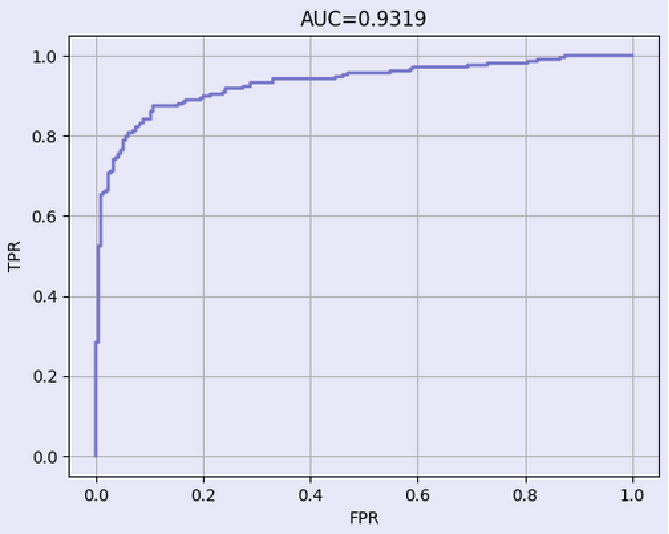

The confusion matrix of our improved ASVM function with rbf kernel also shows the better performance:    
<div align="center">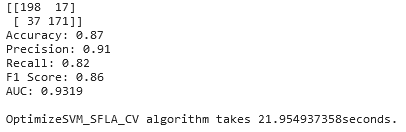</div>


The performance of the optimized and original models for rbf kernel and sigmoid kernel are shown as followed.The overall AUC has been improved.
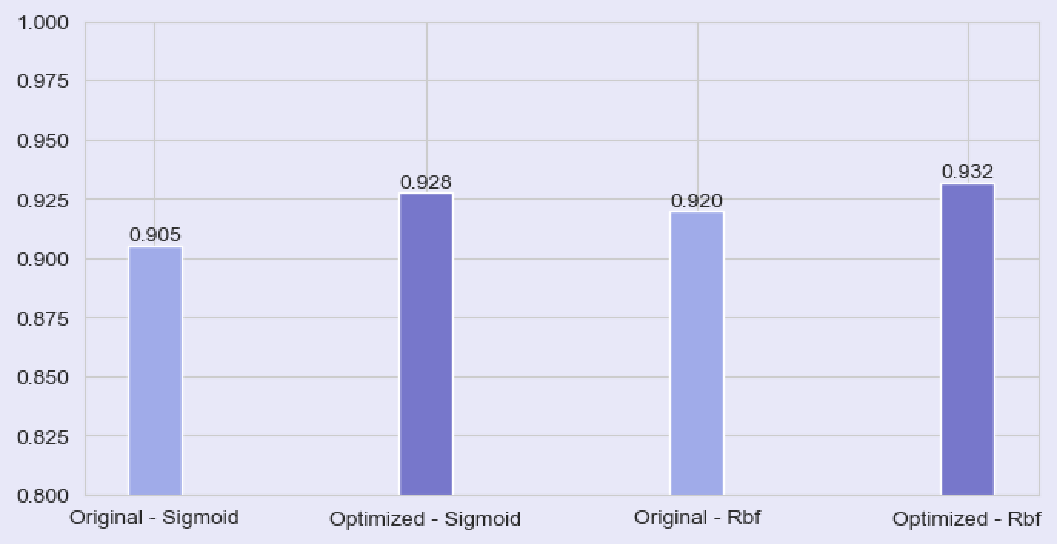

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Due to space reasons, the source code will not be expanded here, we have placed the source code in the appendix.
</p>

# Conclusion
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
In conclusion, there are basic three parts in our projects: Data analysis, using traditional Machine Learning Classification methods and Make improvements to ASVM.

First off, we analyzed the features of the data and filtered the key features, providing a solid foundation for future machine learning research. Secondly, for machine learning methods,we have achieved excellent results using a variety of machine-learning techniques. Then, we conducted a comparative analysis of various machine learning techniques and identified both their benefits and drawbacks.  Finally, for ASVM optimization,we have optimized the ASVM algorithms of the Sigmoid and RBF cores from the original paper, resulting in similar performance with less iteration times and running time(improved about 0.47). 

The final results show that our method achieves good results in the classification of cfDNA data sets, with an AUC value reaching 0.932. Compared with the original paper, the AUC value maintains similar results (AUC value) based on reduced iterations. Also, some methods have improved. For example, the method of ASVM with sigmoid kernel has improved by about 0.02. In summary, both result (average AUC value) and the performance (running time and iteration times) are improvred in our experiment. 

</p>

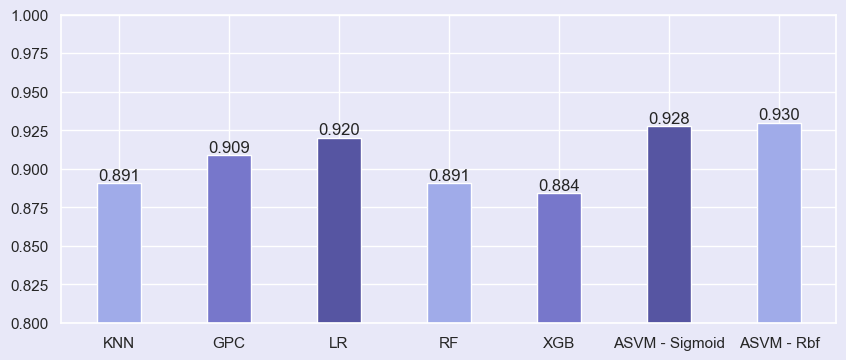

In [51]:
methods = ['KNN', 'GPC', 'LR', 'RF', 'XGB', 'ASVM - Sigmoid', 'ASVM - Rbf']
values = [0.8908, 0.9090, 0.9203, 0.8908, 0.8841, 0.9277, 0.9300]
crs = ["#a0abe9","#7777cb", "#5655a2", "#a0abe9","#7777cb", "#5655a2", "#a0abe9"]

fig = plt.figure(figsize=(10,4))
fig.patch.set_facecolor('#e8e8f8')
plt.gca().set_facecolor('#e8e8f8')
plt.ylim(0.80, 1.0)

# Iterate over methods and values, creating each bar with its own color
for i, (method, value, color) in enumerate(zip(methods, values, crs)):
    plt.bar(i, value, color=color, width=0.4)
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')
    
plt.xticks(range(len(methods)), methods)
plt.show()

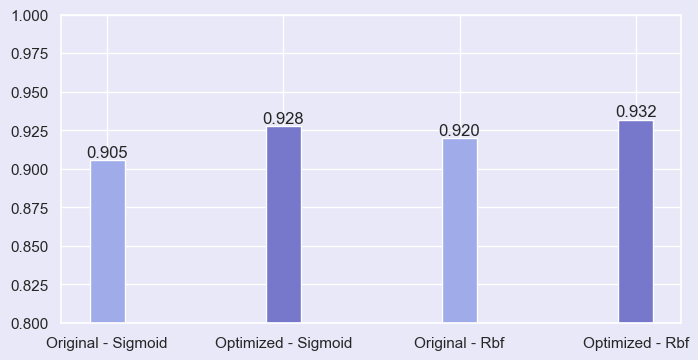

In [52]:
methods = ['Original - Sigmoid', 'Optimized - Sigmoid', 'Original - Rbf', 'Optimized - Rbf']
values = [0.9054, 0.9277, 0.9198, 0.9319]
crs = ["#a0abe9","#7777cb", "#a0abe9","#7777cb"]

fig = plt.figure(figsize=(8,4))
fig.patch.set_facecolor('#e8e8f8')
plt.gca().set_facecolor('#e8e8f8')
plt.ylim(0.80, 1.0)

# Iterate over methods and values, creating each bar with its own color
for i, (method, value, color) in enumerate(zip(methods, values, crs)):
    plt.bar(i, value, color=color, width=0.2)
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')
    
plt.xticks(range(len(methods)), methods)
plt.show()

<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">
Among all classification effects, optimized ASVM with rbf kernel achieved the highest performance, possibly because it provides a more flexible and adaptable model for changing data sets compared to traditional static methods, and makes the model more accurate through adaptive perturbations. Capture the complexity and variability of real data sets.
</p>

# References and Notes:
<p style="text-align: justify;font-family: Times New Roman; line-height: 1.5;font-size: 16px;">

References:     
[1] Albarqouni,S. et al. (2016) AggNet: deep learning from crowds for mitosis detection in breast cancer histology images. IEEE Trans. Med. Imag., 35, 1313–1321.   
[2] Breiman,L. (2001) Random forests. Mach. Learn., 45, 5–32.   
[3] Breitbach,S. et al. (2012) Circulating cell-free DNA. Sports Med., 42, 565–586.   
[4] Bu¨hlmann,P. et al. (2007) Boosting algorithms: regularization, prediction and model fitting. Stat. Sci., 22, 477–505.   
[5] Chandrananda,D. et al. (2015) High-resolution characterization of sequence signatures due to non-random cleavage of cell-free dna. BMC Med. Genomics, 8, 29.   
[6] Chen,X. et al. (2020) Non-invasive early detection of cancer four years before conventional diagnosis using a blood test. Nat. Commun., 11, 1–10.   
[7] Claesen,M. et al. (2014) Easy hyperparameter search using optunity. arXiv preprint arXiv:1412.1114.   
[8] Corcoran,R.B. and Chabner,B.A. (2018) Application of cell-free DNA analysis to cancer treatment. N. Engl. J. Med., 379, 1754–1765.   
[9] Coudray,N. et al. (2018) Classification and mutation prediction from non--small cell lung cancer histopathology images using deep learning. Nat. Med., 24, 1559–1567.   
[10] Cover,T. and Hart,P. (1967) Nearest neighbor pattern classification. IEEE Trans. Inf. Theory, 13, 21–27.   
[11] Cristiano,S. et al. (2019) Genome-wide cell-free DNA fragmentation in patients with cancer. Nature, 570, 385–389.   
[12] De Mattos-Arruda,L. et al. (2013) Circulating tumour cells and cell-free DNA as tools for managing breast cancer. Nat. Rev. Clin. Oncol., 10, 377–389.   
[13] Diaz,L.A. JrBardelli,A. (2014) Liquid biopsies: genotyping circulating tumor DNA. J. Clin. Oncol., 32, 579.   
[14] Diehl,F. et al. (2005) Detection and quantification of mutations in the plasma of patients with colorectal tumors. Proc. Natl. Acad. Sci. USA, 102, 16368–16373.   
[15] Dua,D. and Graff,C. (2017) UCI machine learning repository.   
[16] Dumitru,D. (2009) Prediction of recurrent events in breast cancer using the naive Bayesian classification. Ann. Univ. Craiova Math. Comput. Sci. Ser., 36, 92–96.   
[17] Elshimali,Y.I. et al. (2013) The clinical utilization of circulating cell free DNA (ccfDNA) in blood of cancer patients. Int. J. Mol. Sci., 14, 18925–18958.   
[18] Eusuff,M. et al. (2006) Shuffled frog-leaping algorithm: a memetic meta-heuristic for discrete optimization. Eng. Optim., 38, 129–154.   
[19] Eusuff,M.M. and Lansey,K.E. (2003) Optimization of water distribution network design using the shuffled frog leaping algorithm. J. Water Resources Plan. Manag., 129, 210–225.   
[20] Fong,S. et al. (2018) How meta-heuristic algorithms contribute todeep learning in the hype of big data analytics. In: Pankaj Kumar Sa et al. (eds.) Progress in Intelligent Computing Techniques: Theory, Practice, and Applications. Springer, Singapore, pp. 3–25.   
[21] Friedman,J.H. (2002) Stochastic gradient boosting. Comput. Stat. Data Anal., 38,367–378.   
[22] Furey,T.S. et al. (2000) Support vector machine classification and validation of cancer tissue samples using microarray expression data. Bioinformatics, 16, 906–914.   
[23] Helleday,T. et al. (2014) Mechanisms underlying mutational signatures in human cancers. Nat. Rev. Genet., 15, 585–598.   
[24] Hothorn,T. et al. (2005) The design and analysis of benchmark experiments. J. Comput. Graph. Stat., 14, 675–699.   
[25] Huang,S. et al. (2018) Applications of support vector machine (SVM) learningin cancer genomics.   
[26] Jong,K. et al. (2003) Chromosomal breakpoint detection in human cancer. In: Workshops on Applications of Evolutionary Computation. Springer, pp. 54–65.   
[27] Cristiano, Stephen, et al. "Genome-wide cell-free DNA fragmentation in patients with cancer." Nature 570.7761 (2019): 385-389.   
[28] S. Cristiano, A. Leal, J. Phallen, J. Fiksel, V. Adleff, D. C. Bruhm, S. Ø. Jensen, J. E. Medina, C. Hruban, J. R. White et al., “Genome-wide cell-free dna fragmentation in patients with cancer,” Nature 570, 385–389 (2019)    
Notes:    
All our code has been uploaded to the github repository, link:
https://github.com/wychen-null/CS5483-Project2       
Our topic is based on the optimization and improvement of this paper:
Liu L, Chen X, Wong K C. Early cancer detection from genome-wide cell-free DNA fragmentation via shuffled frog leaping algorithm and support vector machine[J]. Bioinformatics, 2021, 37(19): 3099-3105.
</p>